# Improving Neural Network Performance

1. Vanishing Gradients
    - Activation functions
    - Weight initialization

2. Overfitting
    - Reduce Complexity/Increase Data
    - Dropout Layers
    - Regularization(L! & L2)

3. Normalization
    - Normalizing inputs
    - Batch Normalization
    - Normalizing Activations

4. Gradient Checking and Clipping

5. Optimizers -
    - Momentum
    - Adagrad
    - RMSprop
    - Adam

6. Learning rate scheduling

7. Hyperparameter Tuning
    - No. of hidden layers
    - nodes/layer
    - Batch size


# Early stopping

**Early stopping** is a regularization technique used to prevent overfitting in machine learning models, particularly neural networks, by monitoring the model’s performance on validation data and stopping the training process when the model starts to overfit.



## How Early Stopping Works
1. **Training and Validation Loss Tracking**: During training, both the training loss (error on the training dataset) and validation loss (error on a separate validation dataset) are monitored at each epoch.

2. **Detecting Overfitting**:
Initially, both training and validation losses typically decrease as the model learns the general patterns in the data.
At some point, the training loss might continue to decrease while the validation loss starts to increase. This increase in validation loss indicates that the model is starting to "memorize" or overfit the training data, rather than learning useful patterns that generalize well to unseen data.

3. **Stopping Condition**: Early stopping monitors the validation loss and stops training when the validation loss does not improve after a certain number of epochs (referred to as the patience parameter). This is the point where the model is considered to have reached its optimal generalization ability.

4. **Restoring Best Weights**: To ensure that the model doesn’t use parameters from an overfitted epoch, early stopping can restore the model weights from the epoch with the best (lowest) validation loss.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_classification
import seaborn as sns

2024-11-13 01:30:21.712541: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 01:30:24.486677: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X, y = make_classification(
    n_samples= 250,
    n_features=2,        # Only two features
    n_informative=2,     # Both features are informative
    n_redundant=0,       # No redundant features
    n_clusters_per_class=1,  # Single cluster per class
    class_sep=1.0,       # Slight separation to make classification harder
    flip_y=0.1,          # 10% label noise to make the problem more challenging
    random_state=42
)

<Axes: >

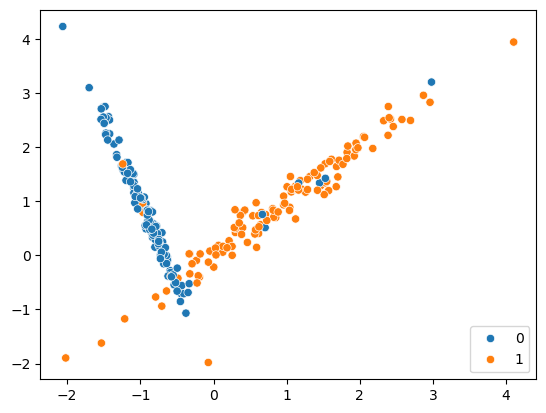

In [4]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X, y, validation_split=0.2, epochs=1000, verbose=0)

2024-11-13 01:31:31.522934: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x779714ff1230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-13 01:31:31.522990: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX230, Compute Capability 6.1
2024-11-13 01:31:32.096822: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-13 01:31:32.711129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-11-13 01:31:34.332752: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


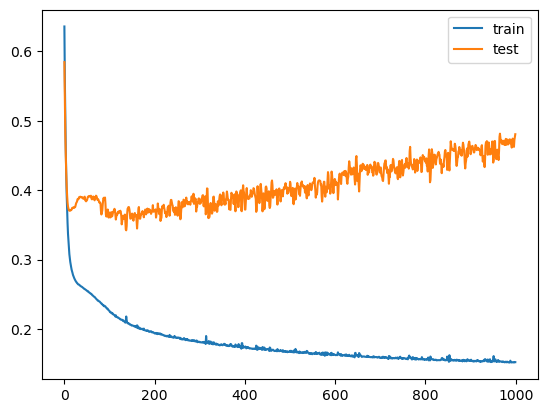

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 10s 1ms/step


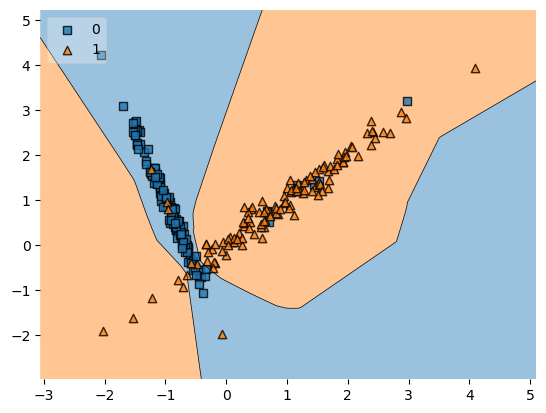

In [9]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [20]:
model2 = Sequential()

model2.add(Dense(256, input_dim=2, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [21]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


1. **monitor**: 	Quantity to be monitored. Defaults to "val_loss".<br>
2. **min_delta**:	Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.<br>
3. **patience**:	Number of epochs with no improvement after which training will be stopped. Defaults to 0.<br>
4. **verbose**:	Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action. Defaults to 0.<br>
5. **mode**:	One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".<br>
6. **baseline**:	Baseline value for the monitored quantity. If not None, training will stop if the model doesn't show improvement over the baseline. Defaults to None.
7. **restore_best_weights**:	Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set. Defaults to False.
8. **start_from_epoch**:	Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped. Defaults to 0.

In [19]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [22]:
history2 = model2.fit(X, y, validation_split=0.2, epochs=3500, callbacks=callback)

Epoch 1/3500
7/7 [==============================] - 1s 28ms/step - loss: 0.6642 - accuracy: 0.7850 - val_loss: 0.6237 - val_accuracy: 0.8600
Epoch 2/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.5968 - accuracy: 0.8850 - val_loss: 0.5671 - val_accuracy: 0.8600
Epoch 3/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.5400 - accuracy: 0.8850 - val_loss: 0.5216 - val_accuracy: 0.8600
Epoch 4/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.4920 - accuracy: 0.8900 - val_loss: 0.4825 - val_accuracy: 0.8600
Epoch 5/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.4512 - accuracy: 0.8900 - val_loss: 0.4526 - val_accuracy: 0.8600
Epoch 6/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.4189 - accuracy: 0.8900 - val_loss: 0.4283 - val_accuracy: 0.8600
Epoch 7/3500
7/7 [==============================] - 0s 8ms/step - loss: 0.3906 - accuracy: 0.8900 - val_loss: 0.4105 - val_accuracy: 0.8600
Epoch 8/3500
7/7 [=

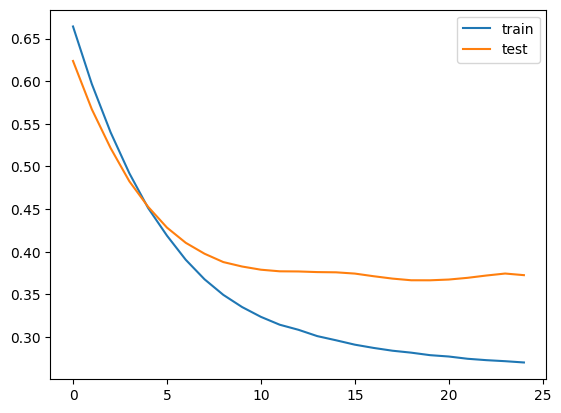

In [23]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 11s 1ms/step


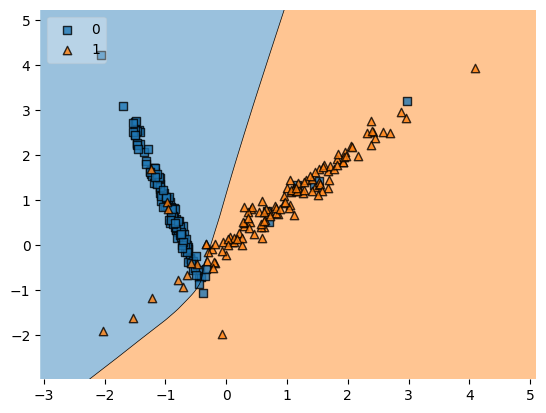

In [25]:
plot_decision_regions(X, y.ravel(), clf = model2, legend=2)
plt.show()